<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [26]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [28]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [29]:
boston_df=pd.read_csv(boston_url)

In [30]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 2

#### For the "Median value of owner-occupied homes" provide a boxplot

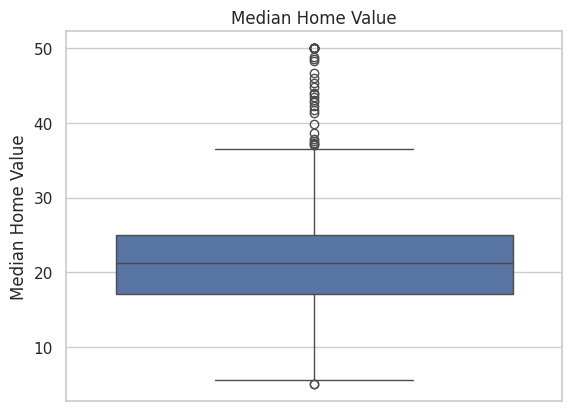

In [25]:
ax = sns.boxplot(y='MEDV',data=boston_df)
pyplot.ylabel('Median Home Value')
pyplot.title('Median Home Value')
pyplot.show()

 The result shows that the median of median value homes is around 21 and 50% of the median value homes are between 17 and 25.

#### Provide a bar plot for the Charles river variable

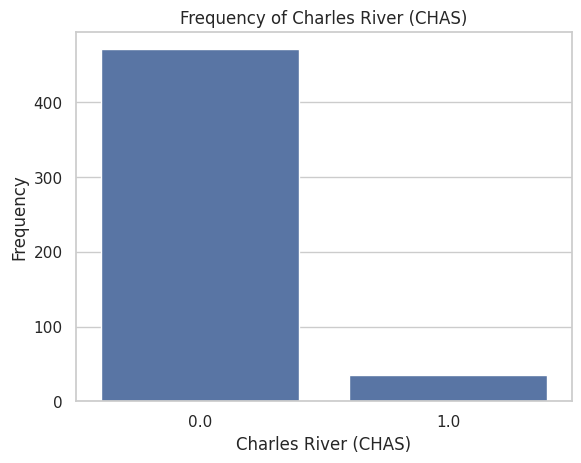

In [13]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.xlabel('Charles River (CHAS)')
pyplot.ylabel('Frequency')
pyplot.title('Frequency of Charles River (CHAS)')
pyplot.show()

The result shows that the frequency of homes bounded by the Charles river is lower than the frequency of those not bounded by the Charles river.

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

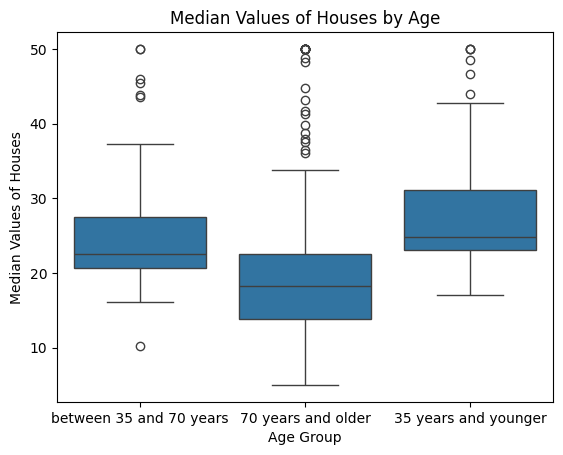

In [47]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x='age_group',y='MEDV',data=boston_df)
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Values of Houses')
pyplot.title('Median Values of Houses by Age')
pyplot.show()

The results show the median of the median values of houses is highest for the 35 years and younger age group and lowest for the 70 years and older age group.

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

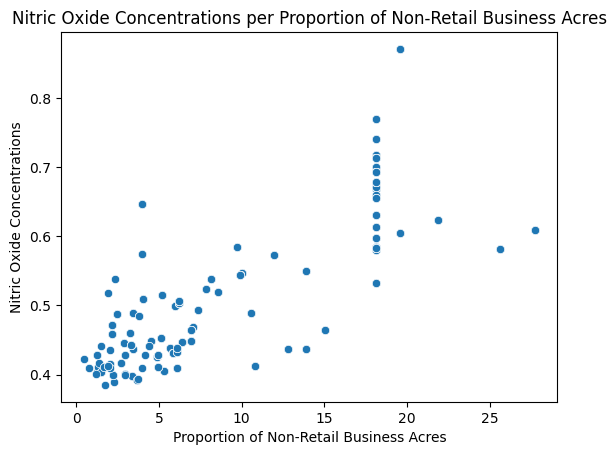

In [12]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxide Concentrations')
pyplot.title('Nitric Oxide Concentrations per Proportion of Non-Retail Business Acres')
pyplot.show()

The results show an upward sloping relationship between Nitric oxide concentrations and the proportion of non-retail business acres.

#### Create a histogram for the pupil to teacher ratio variable

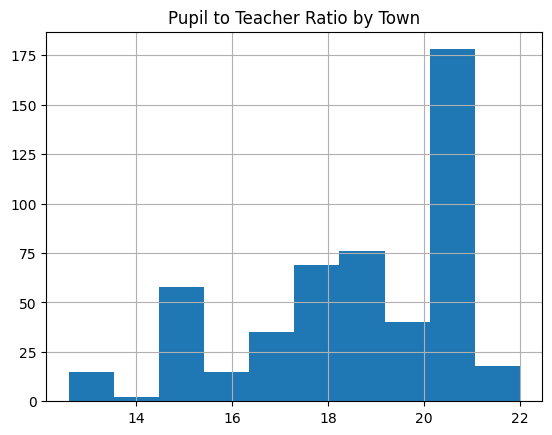

In [25]:
boston_df.hist(column=['PTRATIO'])
pyplot.title('Pupil to Teacher Ratio by Town')
pyplot.show()

### Task 3

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: There is no significant difference in the median value of houses bounded by the Charles river or not.

Alternate hypothesis: There is a significant difference in the median value of houses bounded by the Charles river or not.

Alpha (α): 0.05

In [32]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The Levene test shows a p-value below 0.05 meaning that population variances are equal.

In [33]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The results of the T test show a p-value of less than the alpha of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant difference in the median values of houses bounded by the Charles river or not.

####     Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null hypothesis: There is no difference between the median values of houses for each proportion of owner-occupied units built prior to 1940.

Alternate hypothesis: There is a difference between the median values of houses for each proportion of owner-occupied units built prior to 1940.

Alpha (α): 0.05

In [46]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Using the discretized age group variable from task 2, the results of the ANOVA test show a p-value less than the alpha of 0.05. This means the null hypothesis can be rejected and it can be concluded that there is a difference between the median values of houses for each proportion of owner-occupied units built prior to 1940.

####  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternate hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alpha (α): 0.05

In [14]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The p-value result of the Pearson Correlation test is below the alpha of 0.05. This means we can reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

The correlation coefficient of the Pearson Correlation test is 0.76. This means the relationship identified between Nitric oxide concentrations and proportion of non-retail business acres is a high positive correlation.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

Alternate hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

Alpha (α): 0.05

In [48]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        09:31:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model shows a p-value less than the alpha of 0.05. This means that we can reject the null hypothesis and conclude that there is a significant impact of an additional weighted distance to the five Boston employment centres on the median values of owner-occupied homes.

In [49]:
scipy.stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

The correlation coefficient from this model is 0.25. The Pearson correlation test above checks whether the correlation coefficient is positive or negative. The results show that it can be concluded that correlation is positive, but not particularly strong.

### Overall Conclusion

#### Is there a significant difference in the median value of houses bounded by the Charles river or not?

Yes, the data shows a statistically significant difference in the median values of houses bounded or not by the Charles river.

#### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Yes, the data shows a statistically significant difference in the median values of houses for each proportion of owner-occupied units built before 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?    

No, the data shows a high positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

There is a mild positive correlation between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes.